In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
#Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
#Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
#Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Predict using Decision Tree
dt_pred = dt_model.predict(X_test)

In [ ]:
#Evaluate Decision Tree
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", round(dt_acc * 100, 2))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 70.13
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



In [ ]:
#Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predict using Random Forest
rf_pred = rf_model.predict(X_test)

In [ ]:
#Evaluate Random Forest
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_acc * 100, 2))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 75.32
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



/tmp/ipython-input-1275851730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette=['orange', 'green'])


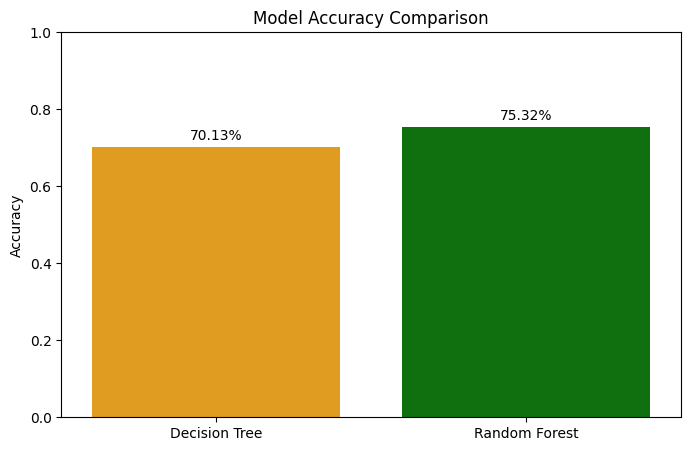

In [ ]:
#Compare accuracy of both models in a single bar plot
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_acc, rf_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette=['orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{round(acc * 100, 2)}%", ha='center')

# Observation:
# This graph compares the overall accuracy of both models on the test set.
# We can observe which model performs better and by how much.
plt.show()

/tmp/ipython-input-3664078559.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


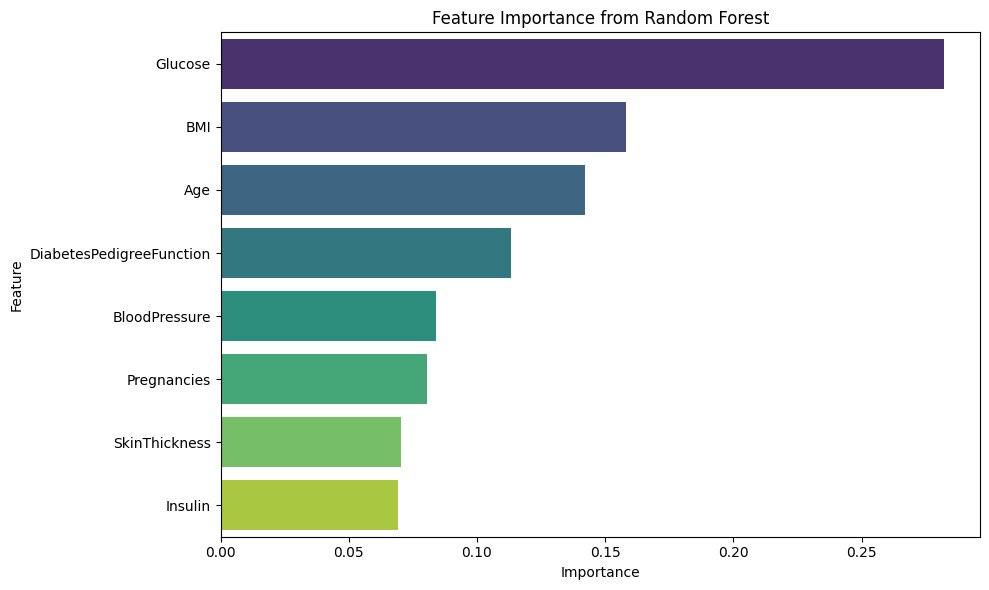

In [ ]:
#Plot feature importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Observation:
# This graph shows which features were most important for the Random Forest predictions.
# We can understand which medical measurements influence the outcome the most.
plt.tight_layout()
plt.show()

In [ ]:
#Plot confusion matrix heatmaps for both models
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(50.722222222222214, 0.5, 'Actual')

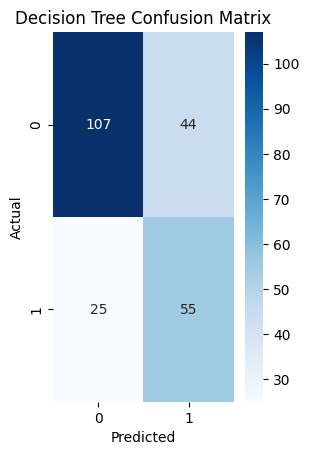

In [ ]:
# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Observation:
# This shows how the Decision Tree is performing.
# The diagonal cells represent correct predictions, while off-diagonal are misclassifications.


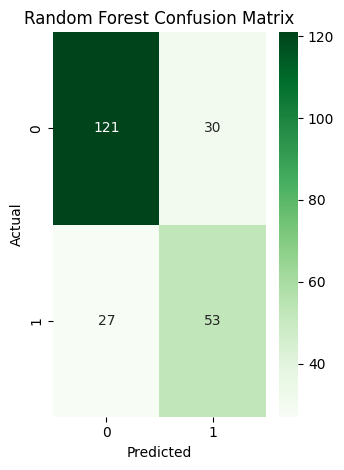

In [ ]:
# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Observation:
# This shows how the Random Forest is performing.
# We can visually compare where it outperforms the Decision Tree in making fewer mistakes.

plt.tight_layout()
plt.show()

OBSERVATIONS:
1.The Random Forest model does better at identifying non-diabetic patients (TN = 121, higher than Decision Tree’s 107).
2. It also makes fewer mistakes predicting non-diabetics as diabetics (FP = 30 vs 44).
3. The number of missed diabetics (FN = 27) is similar to the Decision Tree, but the overall prediction accuracy is better because it reduces false positives.

OBSERVATIONS:
1.The Random Forest has more true negatives, meaning it better identifies healthy people.
2.It also has fewer false positives, meaning it is less likely to falsely alarm non-diabetics.
3.The false negatives are similar, which means both models still miss some diabetic cases, but the overall performance of the Random Forest is better because it reduces false alarms and makes more correct predictions.